In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from pyhdf.SD import SD, SDC
from tqdm import trange, tqdm
from matplotlib import cm
import io
from io import BytesIO
from matplotlib.colors import Normalize

In [2]:
def read_hdf(path, is_init):
    f = SD(path, SDC.READ)
    arr = f.select("Data-Set-2").get()
    dim0 = f.select("fakeDim0").get()
    dim1 = f.select("fakeDim1").get()
    if is_init:
        return arr, dim0, dim1
    dim2 = f.select("fakeDim2").get()
    return arr, dim0, dim1, dim2
    

In [3]:
data, i, j, k = read_hdf('/Users/reza/Career/DMLab/SURROGATE/Data/pfss/2024-12-15/br.hdf', False)

In [4]:
data.shape

(101, 101, 100)

In [5]:
data = np.transpose(data, (2, 1, 0))

In [6]:
distance = np.expand_dims(k, axis=-1)
distance = np.expand_dims(distance, axis=-1)
distance.shape

(100, 1, 1)

In [8]:
normalized_data = data * (distance ** 2)

In [9]:
max_, min_ = np.max(normalized_data), np.min(normalized_data)

In [10]:
normalized_data = (normalized_data - min_) / (max_ - min_)

In [ ]:
data = normalized_data
# Convert indices to spherical coordinates
radii = np.linspace(1, 2, 100)  # Example radial values
theta = np.linspace(0, np.pi, 101)  # Latitude from 0 to pi
phi = np.linspace(0, 2*np.pi, 101)  # Longitude from 0 to 2*pi

theta_grid, phi_grid = np.meshgrid(theta, phi, indexing="ij")

# Reduce the number of frames for efficiency
num_frames = 100  # Instead of 100

# Create storage for video frames
frames = []

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in trange(num_frames):
    r = radii[i * (100 // num_frames)]  # Sample at regular intervals
    
    x = r * np.sin(theta_grid) * np.cos(phi_grid)
    y = r * np.sin(theta_grid) * np.sin(phi_grid)
    z = r * np.cos(theta_grid)

    ax.clear()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_title(f"Slice {i+1}")

    # Use scatter plot instead of surface plot for efficiency
    ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=data[i].flatten(), cmap='jet_r', s=1)

    # Save frame to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()

# Save frames as MP4 video
video_path = "spherical_data.mp4"
imageio.mimsave(video_path, frames, fps=15)

print(f"Video saved as {video_path}")


SyntaxError: invalid syntax (2349148375.py, line 51)

100%|██████████| 100/100 [00:18<00:00,  5.50it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved as cylindrical_data.mp4


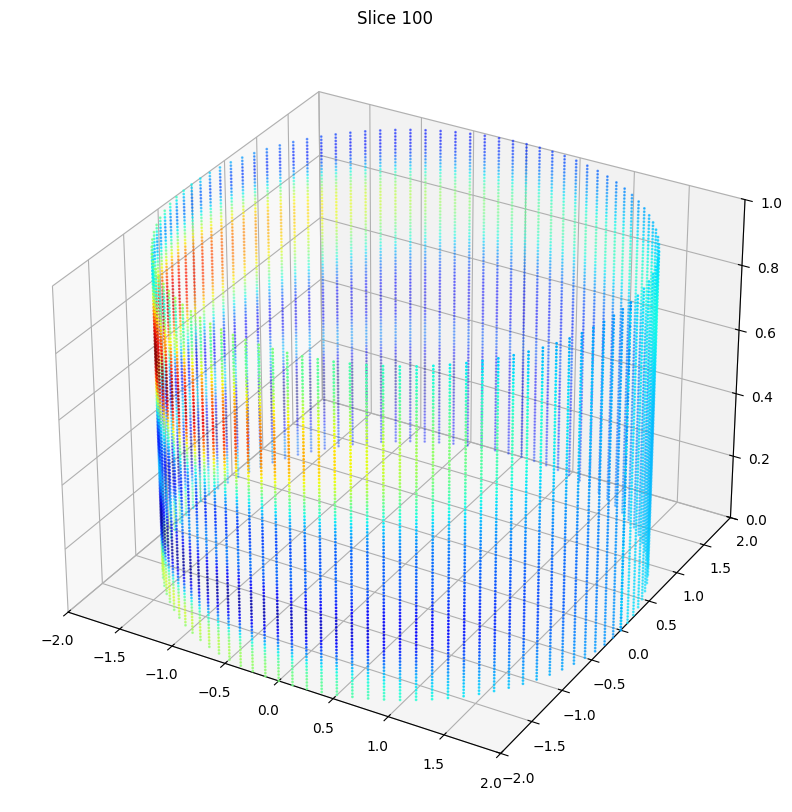

In [12]:
data = normalized_data
num_frames = 100

# Create a grid of theta and z values (for cylindrical representation)
theta = np.linspace(0, 2 * np.pi, 101)  # Azimuthal angle from 0 to 2*pi
z = np.linspace(0, 1, 101)  # Height from 0 to 1

theta_grid, z_grid = np.meshgrid(theta, z, indexing="ij")

# Example radius values that increase as we move from slice to slice
radii = np.linspace(1, 2, num_frames)

# Create storage for video frames
frames = []

# Create a figure for plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in trange(num_frames):
    r = radii[i]  # Get the radius for this slice
    
    # Convert cylindrical coordinates (r, theta, z) to Cartesian (x, y, z)
    x = r * np.cos(theta_grid)
    y = r * np.sin(theta_grid)
    z_vals = z_grid  # z remains the same for the cylindrical structure
    
    # Clear the axis to prepare for the next plot
    ax.clear()
    
    # Set axis limits
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 1])
    ax.set_title(f"Slice {i+1}")
    
    # Use scatter plot for efficiency
    ax.scatter(x.flatten(), y.flatten(), z_vals.flatten(), c=data[i].flatten(), cmap='jet_r', s=1)

    # Save the current frame to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()

# Save the frames as an MP4 video
video_path = "cylindrical_data.mp4"
imageio.mimsave(video_path, frames, fps=15)

print(f"Video saved as {video_path}")